In [18]:
from visualize_embeddings import *
import torch

In [19]:
sPathEmbeddings = "../../data/processed/summary_embeddings/"
sNameEmbeddingA = "tangible_cleaner_prec.pkl"
sNameEmbeddingB = "intangible_cleaner_prec.pkl"
iNumEmbeddings = 10

In [20]:
# Surface cleaner
lClaimsSurface = [
    "Our surface cleaner delivers a mirror-like shine every time.",
    "Say goodbye to streaks and smudges with our powerful formula.",
    "Achieve a noticeable sparkle on all surfaces with just one application.",
    "Experience surfaces so clean, you can see your reflection in them.",
    "Our cleaner leaves behind a gleaming, polished finish that lasts.",
    "Restore surfaces to their original luster with ease.",
    "Enjoy visibly brighter and shinier countertops, tables, and more.",
    "Transform dull surfaces into glossy showcases in seconds.",
    "Witness the difference with surfaces that look and feel brand new.",
    "Get a professional-level shine without the hassle or expense.",
    "Elevate your surroundings with a touch of brilliance.",
    "Unleash the hidden beauty of your home with our surface cleaner.",
    "Experience the joy of pristine surfaces that brighten your space.",
    "Bring a sense of clarity and freshness to your environment.",
    "Enhance the ambiance of any room with surfaces that radiate.",
    "Feel the satisfaction of a space that sparkles with cleanliness.",
    "Transform your living space into a haven of luminosity.",
    "Revel in the beauty of surfaces that reflect your attention to detail.",
    "Discover the magic of surfaces that shimmer with cleanliness.",
    "Immerse yourself in the brilliance of a home that truly shines."
]
# Hair product
lClaimsHair = [
    "Experience 50% more visible shine after just one use.",
    "Formulated with light-reflecting technology for a glossy finish.",
    "Transform dull strands into radiant, luminous locks.",
    "Infused with nourishing oils that enhance natural shine.",
    "See instant brilliance with our advanced shine-boosting formula.",
    "Locks in moisture to amplify hair's natural luster.",
    "Achieve salon-quality shine without leaving home.",
    "Visible reduction in dullness, replaced with stunning shine.",
    "Say goodbye to lackluster hair, hello to mirror-like shine.",
    "Clinically proven to enhance shine by up to 70%.",
    "Elevate your confidence with hair that gleams under any light.",
    "Embrace the allure of luminous hair that turns heads.",
    "Unleash the power of radiant hair that speaks volumes.",
    "Transform your look with hair that exudes brilliance.",
    "Feel the difference of hair that shines with vitality and health.",
    "Rediscover the joy of hair that beams with inner vibrancy.",
    "Indulge in the luxury of hair that shimmers with elegance.",
    "Step into the spotlight with hair that radiates beauty.",
    "Experience the magic of hair that dazzles with every movement.",
    "Unlock the secret to hair that shines from within, reflecting your inner glow."
]

lClaimsHairShort = [
    "Experience mirror-like shine with every use.",
    "Transform dull strands into glossy perfection.",
    "Get hair that gleams and turns heads.",
    "Achieve salon-quality shine at home.",
    "Infuse your locks with radiant, luminous shine.",
    "Unlock the confidence of luminous, vibrant hair.",
    "Elevate your haircare routine with brilliance and glamour.",
    "Feel the difference of silky-smooth, radiant hair.",
    "Indulge in the luxury of effortlessly shiny locks.",
    "Reveal your hair's inner glow and embrace its natural beauty."
]

lClaims = lClaimsSurface

In [21]:
lSurfacePick = [1, 4, 8, 12, 18, 15]

In [22]:
from transformers import AutoTokenizer, GPT2LMHeadModel

s_model = 'gpt2'
model = GPT2LMHeadModel.from_pretrained(s_model)
tokenizer = AutoTokenizer.from_pretrained(s_model)

lInputEmbeddings = list()
for claim in lClaims:
    lInputEmbeddings.append(torch.mean(model.get_input_embeddings()(tokenizer.encode(claim, return_tensors="pt")), dim = 1))
tInputEmbeddings = torch.stack(lInputEmbeddings).squeeze(1)

In [23]:
lClaimsPick = [0, 3, 4, 5, 10, 12, 16, 19]
lSelectedClaims = [lClaims[i] for i in lClaimsPick]
lSelectedClaims

['Our surface cleaner delivers a mirror-like shine every time.',
 'Experience surfaces so clean, you can see your reflection in them.',
 'Our cleaner leaves behind a gleaming, polished finish that lasts.',
 'Restore surfaces to their original luster with ease.',
 'Elevate your surroundings with a touch of brilliance.',
 'Experience the joy of pristine surfaces that brighten your space.',
 'Transform your living space into a haven of luminosity.',
 'Immerse yourself in the brilliance of a home that truly shines.']

In [24]:
lClaims[lClaimsPick[1]], lClaims[lClaimsPick[3]], lClaims[lClaimsPick[5]], lClaims[lClaimsPick[6]]

('Experience surfaces so clean, you can see your reflection in them.',
 'Restore surfaces to their original luster with ease.',
 'Experience the joy of pristine surfaces that brighten your space.',
 'Transform your living space into a haven of luminosity.')

In [25]:
tEmbeddingsA, tEmbeddingsB = load_embeddings(sPathEmbeddings, sNameEmbeddingA, sNameEmbeddingB)
tEmbeddings = torch.cat((tEmbeddingsA, tEmbeddingsB), dim=0)
tEmbeddings_demeaned = tEmbeddings - torch.mean(tEmbeddings, dim=0)

tInputEmbeddingsA, tInputEmbeddingsB = tInputEmbeddings[:iNumEmbeddings], tInputEmbeddings[iNumEmbeddings:]
tInputEmbeddings = torch.cat((tInputEmbeddingsA, tInputEmbeddingsB), dim=0)
tInputEmbeddings_demeaned = tInputEmbeddings - torch.mean(tInputEmbeddings, dim=0)
#tEmbeddings_demeaned = tEmbeddings - torch.mean(tEmbeddings, dim=1).reshape(-1, 1)

tLLEmbeddingsA, tLLEmbeddingsB = load_embeddings(sPathEmbeddings, f"first_last_layer/lh_{sNameEmbeddingA}", f"first_last_layer/lh_{sNameEmbeddingB}")
tLLEmbeddings = torch.cat((tLLEmbeddingsA, tLLEmbeddingsB), dim=0)
tLLEmbeddings_demeaned = tLLEmbeddings - torch.mean(tLLEmbeddings, dim=0)

tFLEmbeddingsA, tFLEmbeddingsB = load_embeddings(sPathEmbeddings, f"first_last_layer/fh_{sNameEmbeddingA}", f"first_last_layer/fh_{sNameEmbeddingB}")
tFLEmbeddings = torch.cat((tFLEmbeddingsA, tFLEmbeddingsB), dim=0)
tFLEmbeddings_demeaned = tFLEmbeddings - torch.mean(tFLEmbeddings, dim=0)

In [26]:
SE = SummaryEmbeddings(lClaims)
seBert = SE.bert()
seBoW = SE.bow()
seWord2Vec = SE.word2vec()

similarity_matrix_bert = calc_similarity_matrix(seBert)
similarity_matrix_bow = calc_similarity_matrix(seBoW)
similarity_matrix_word2vec = calc_similarity_matrix(seWord2Vec)
similarity_matrix_re = calc_similarity_matrix(tEmbeddings.detach().numpy())
similarity_matrix_ie = calc_similarity_matrix(lInputEmbeddingsAll.detach().numpy())
similarity_matrix_re_fl = calc_similarity_matrix(tFLEmbeddings.detach().numpy())
similarity_matrix_re_ll = calc_similarity_matrix(tLLEmbeddings.detach().numpy())

In [27]:
# surface, different / similar
lClaims[1], lClaims[16]
lClaims[18], lClaims[8]
lClaims[5], lClaims[2]
lClaims[16], lClaims[1]

('Transform your living space into a haven of luminosity.',
 'Say goodbye to streaks and smudges with our powerful formula.')

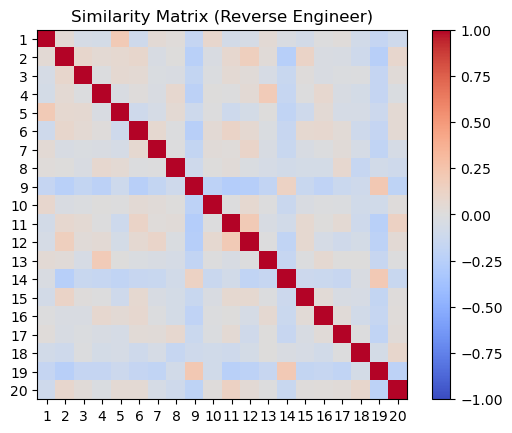

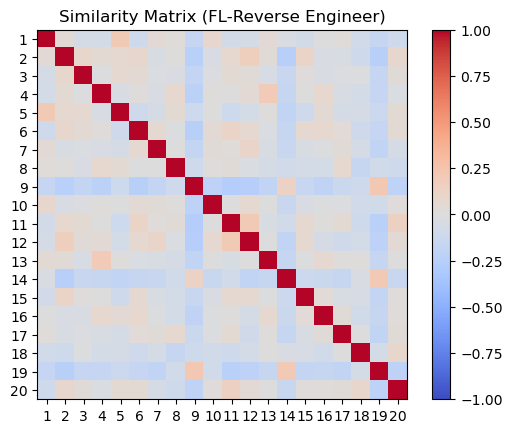

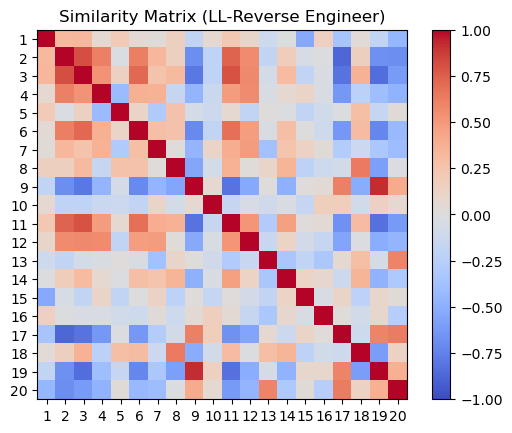

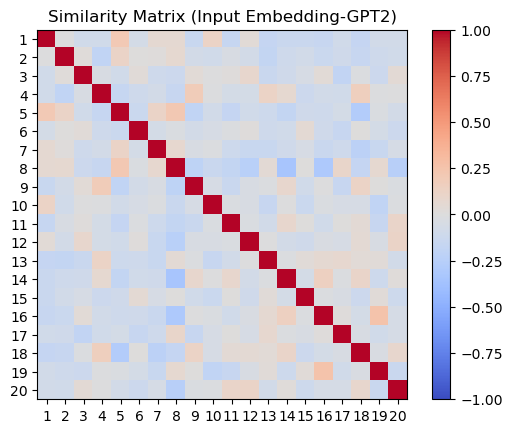

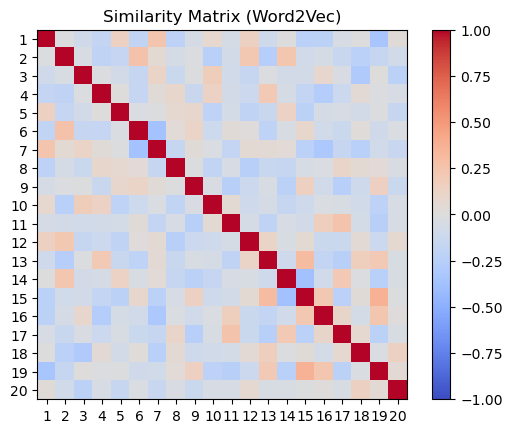

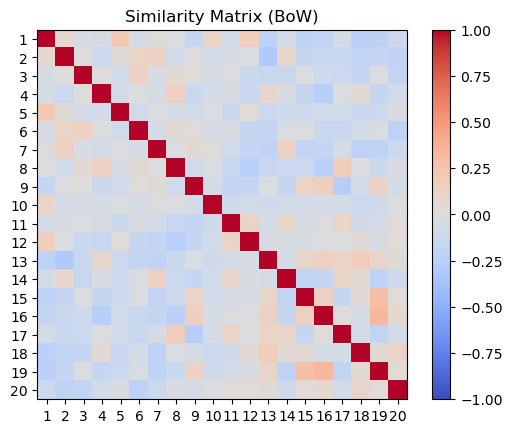

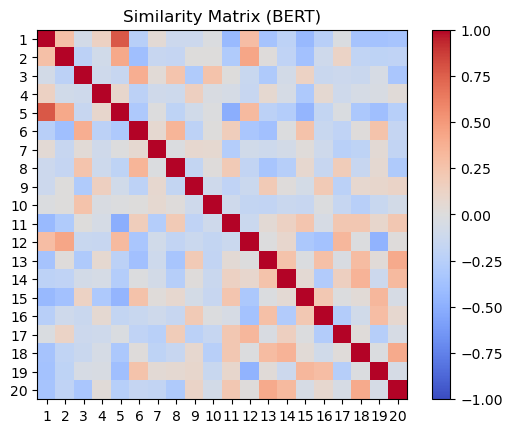

In [28]:
visualize_correlations(similarity_matrix_re, "Reverse Engineer")
visualize_correlations(similarity_matrix_re_fl, "FL-Reverse Engineer")
visualize_correlations(similarity_matrix_re_ll, "LL-Reverse Engineer")
visualize_correlations(similarity_matrix_ie, "Input Embedding-GPT2")
visualize_correlations(similarity_matrix_word2vec, "Word2Vec")
visualize_correlations(similarity_matrix_bow, "BoW")
visualize_correlations(similarity_matrix_bert, "BERT")

In [29]:
# surface, RE
lClaims[13], lClaims[1]

('Bring a sense of clarity and freshness to your environment.',
 'Say goodbye to streaks and smudges with our powerful formula.')

In [30]:
# hair
lClaims[11], lClaims[17], lClaims[16]

('Unleash the hidden beauty of your home with our surface cleaner.',
 'Revel in the beauty of surfaces that reflect your attention to detail.',
 'Transform your living space into a haven of luminosity.')

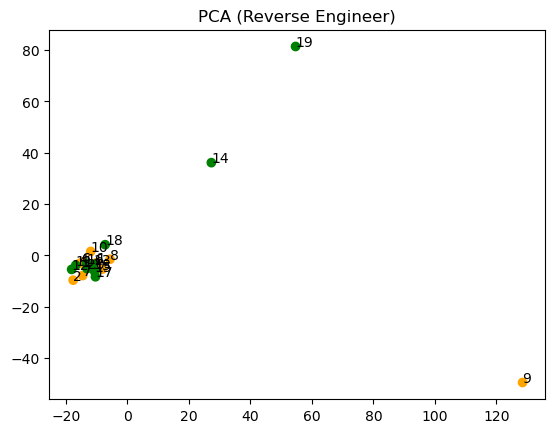

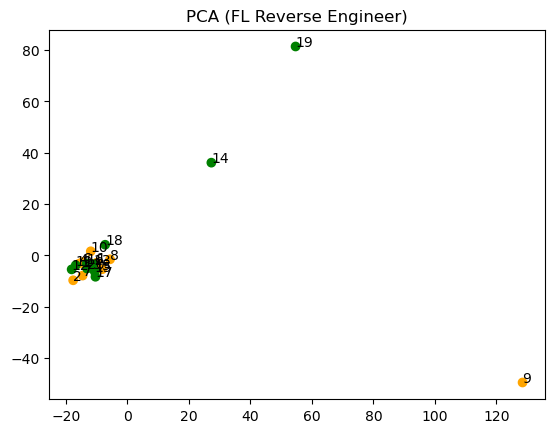

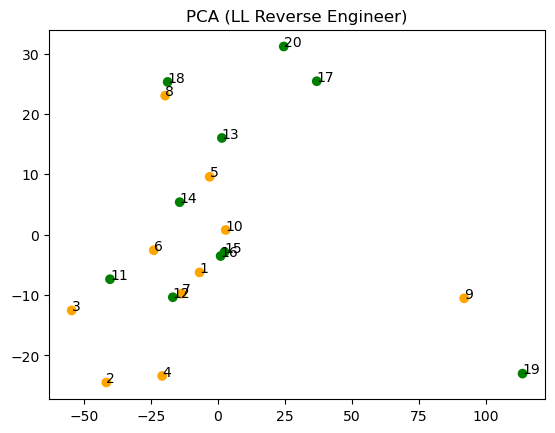

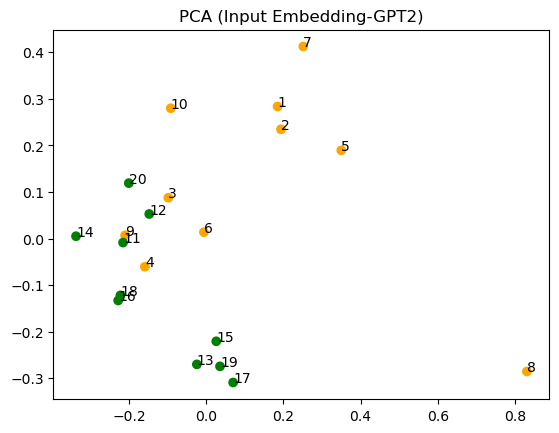

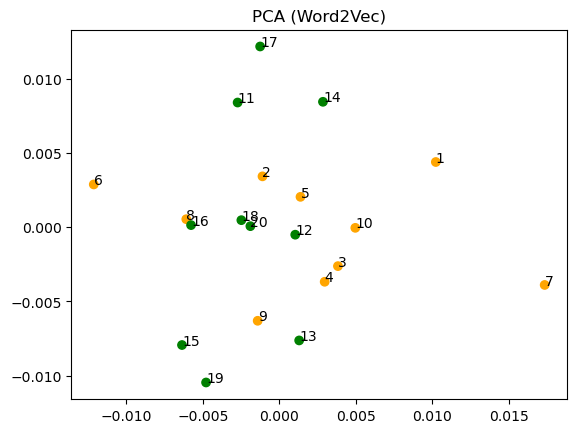

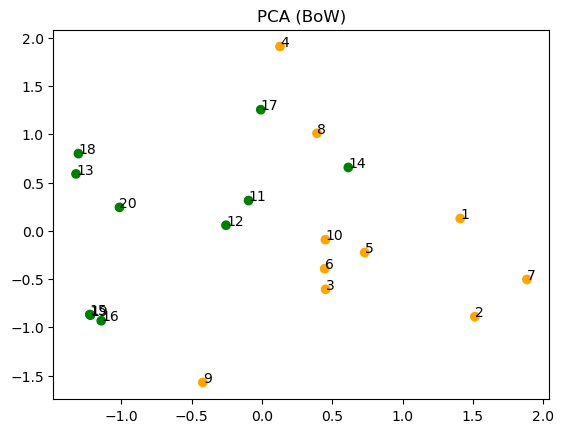

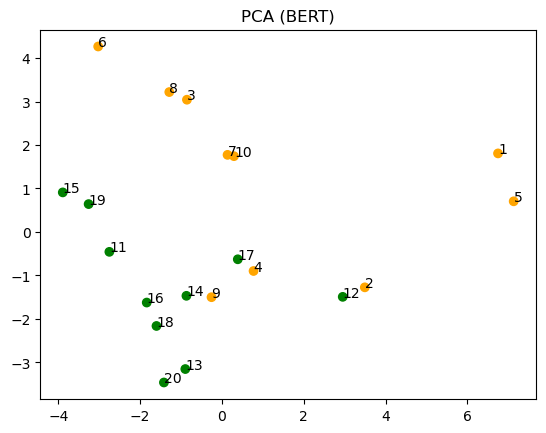

In [31]:
visualize_pca(tEmbeddings.detach().numpy(), "Reverse Engineer")
visualize_pca(tFLEmbeddings.detach().numpy(), "FL Reverse Engineer")
visualize_pca(tLLEmbeddings.detach().numpy(), "LL Reverse Engineer")
visualize_pca(tInputEmbeddings.detach().numpy(), "Input Embedding-GPT2")
visualize_pca(seWord2Vec, "Word2Vec")
visualize_pca(seBoW, "BoW")
visualize_pca(seBert, "BERT")

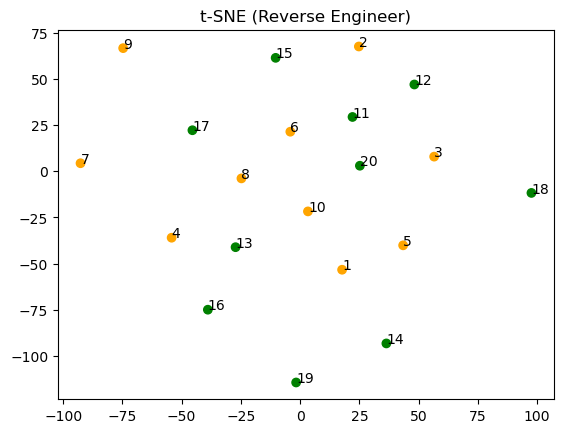

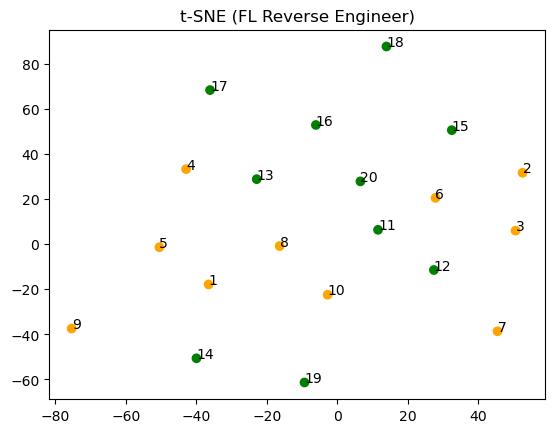

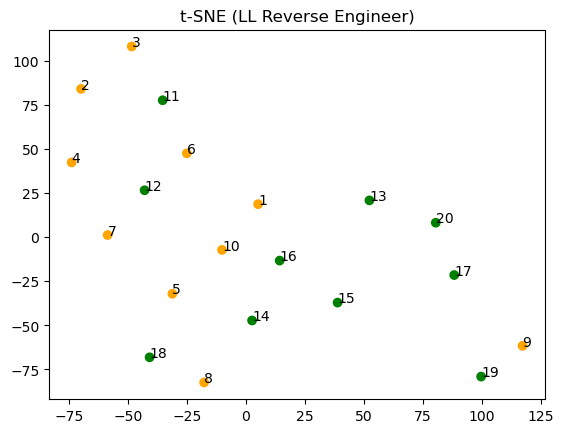

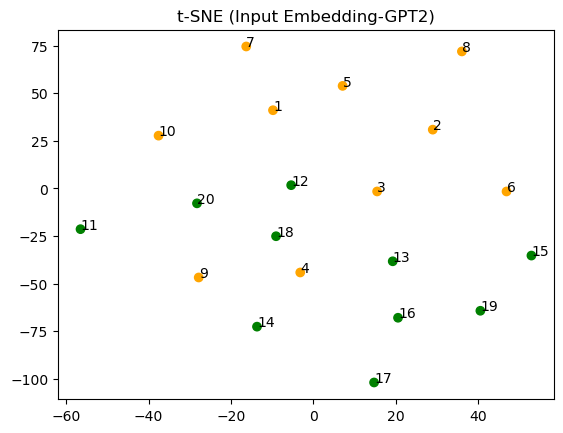

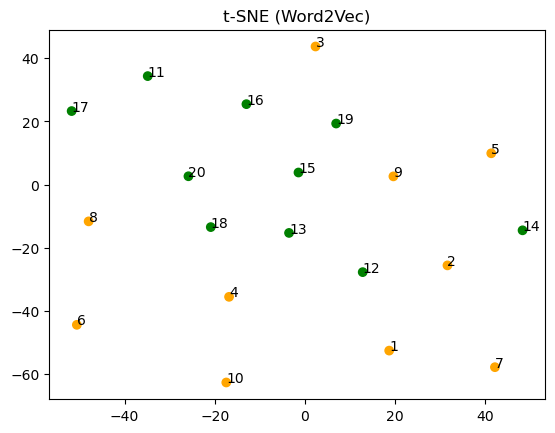

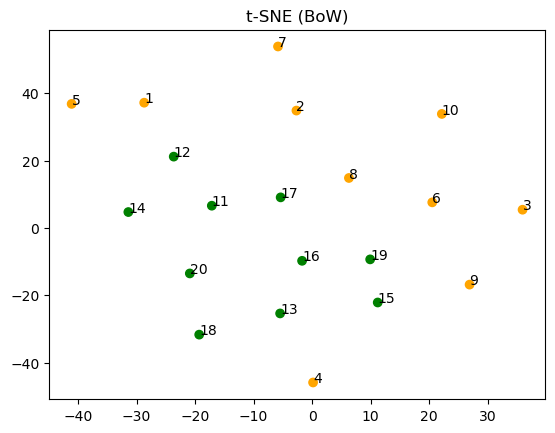

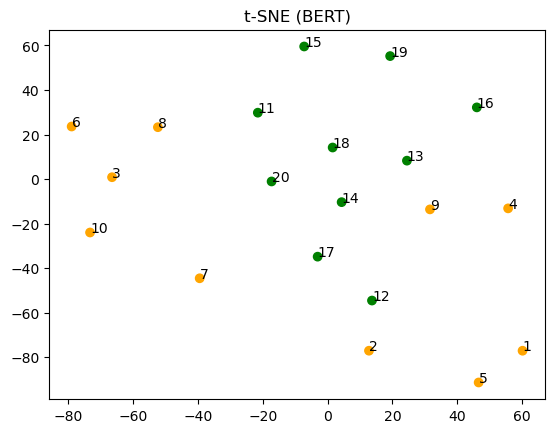

In [32]:
iPerplexity = 10
visualize_tsne(tEmbeddings.detach().numpy(), "Reverse Engineer", iPerplexity)
visualize_tsne(tFLEmbeddings.detach().numpy(), "FL Reverse Engineer", iPerplexity)
visualize_tsne(tLLEmbeddings.detach().numpy(), "LL Reverse Engineer", iPerplexity)
visualize_tsne(tInputEmbeddings.detach().numpy(), "Input Embedding-GPT2", iPerplexity)
visualize_tsne(seWord2Vec, "Word2Vec", iPerplexity)
visualize_tsne(seBoW, "BoW", iPerplexity)
visualize_tsne(seBert, "BERT", iPerplexity)

In [33]:
# hair
lClaims[11], lClaims[12], lClaims[1]

('Unleash the hidden beauty of your home with our surface cleaner.',
 'Experience the joy of pristine surfaces that brighten your space.',
 'Say goodbye to streaks and smudges with our powerful formula.')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


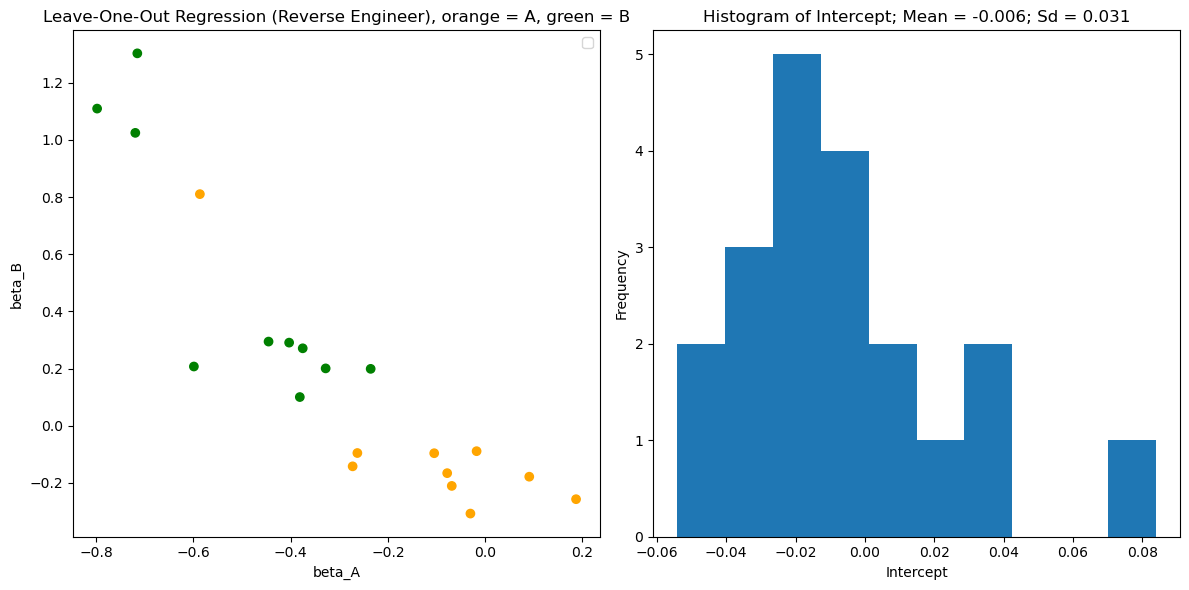

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


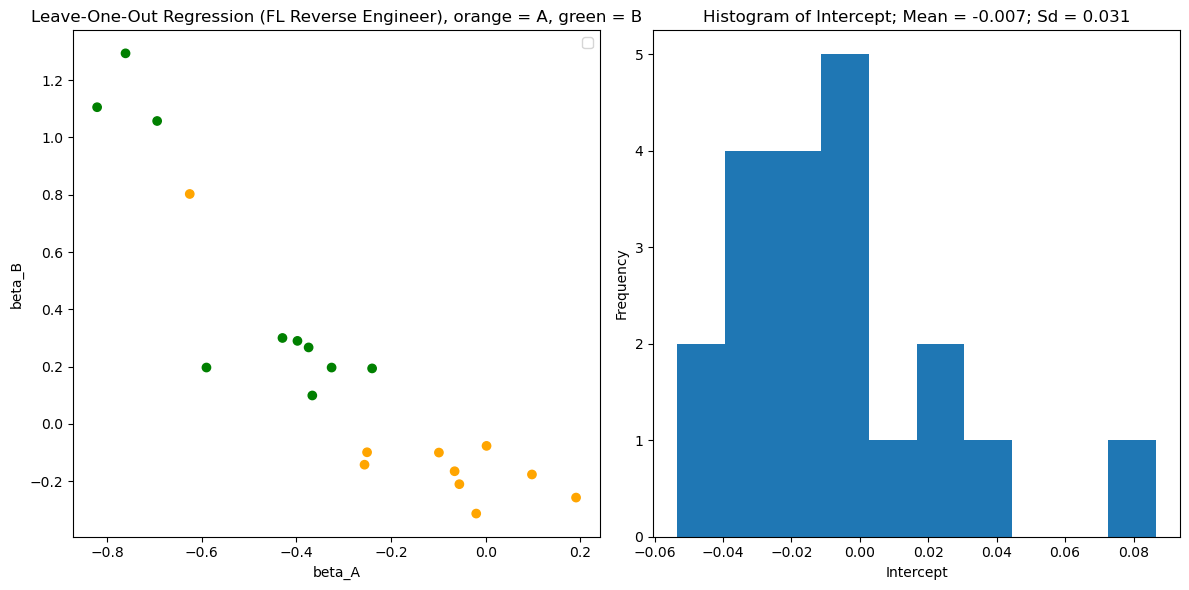

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


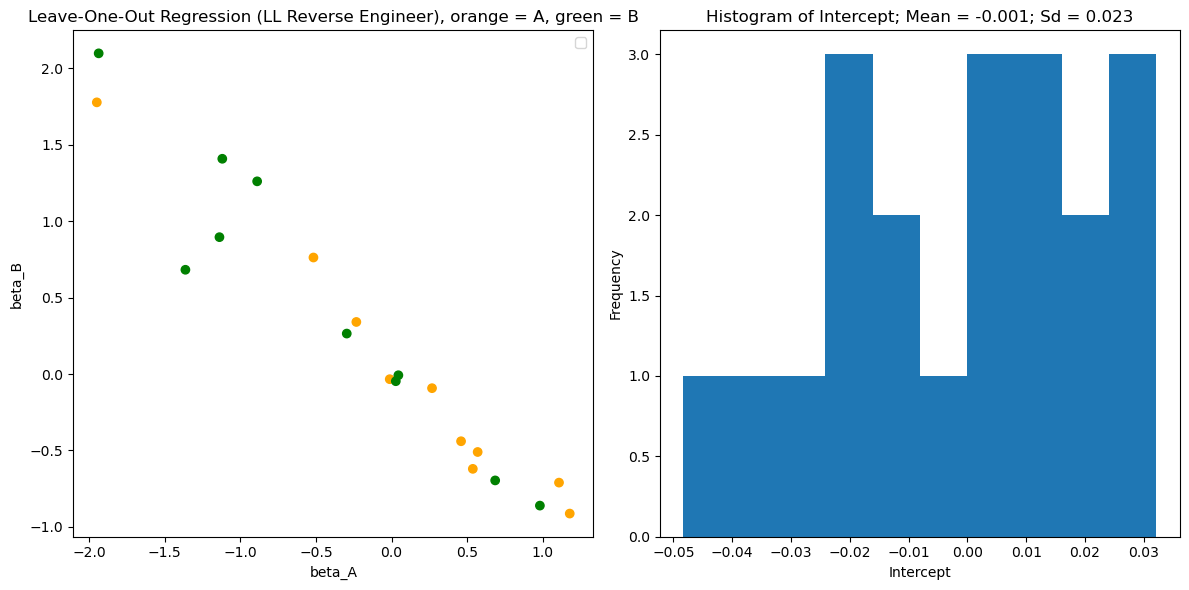

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


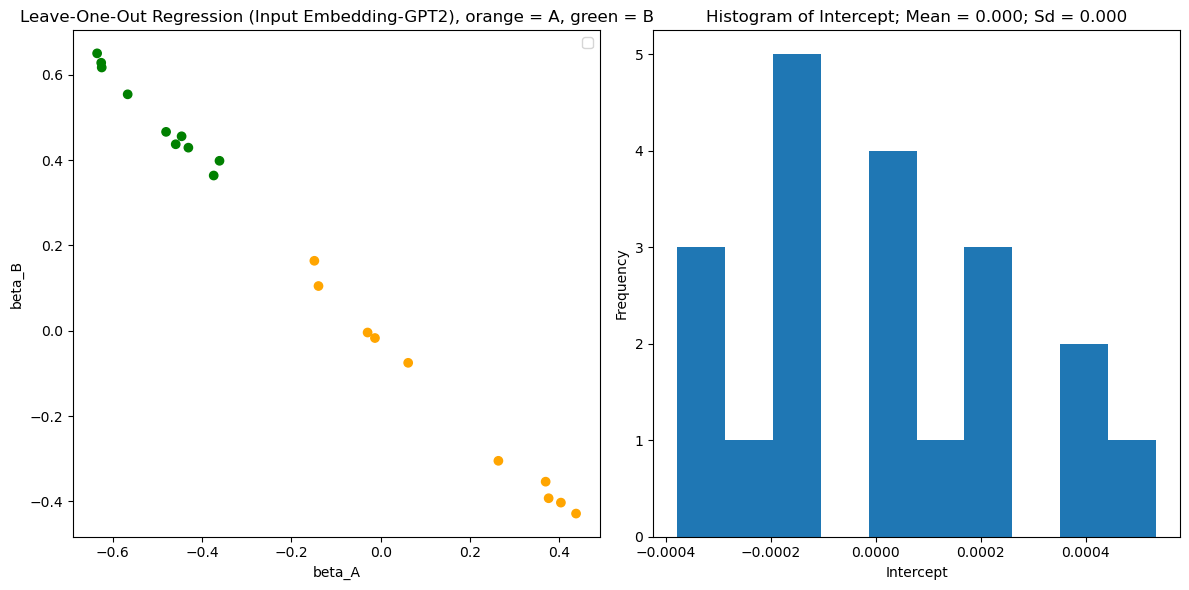

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


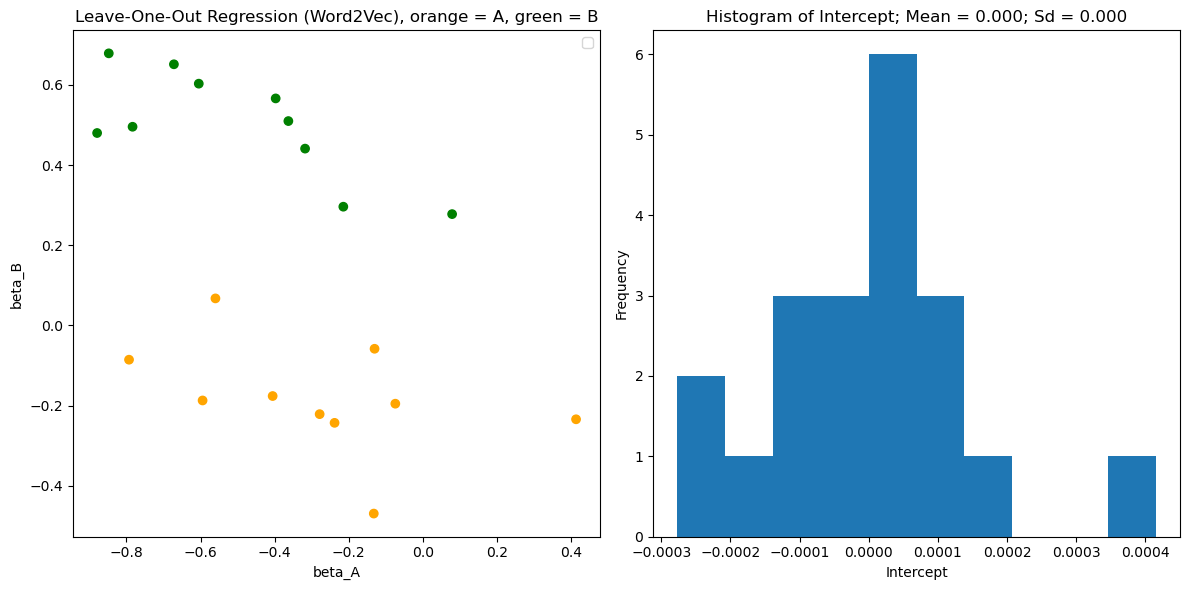

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


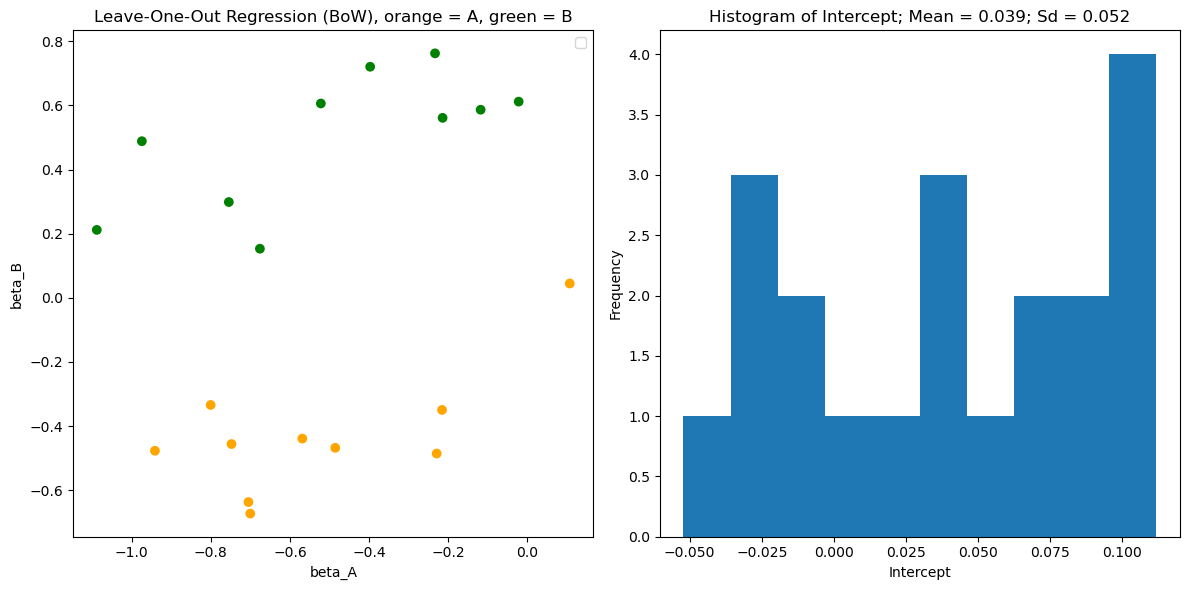

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


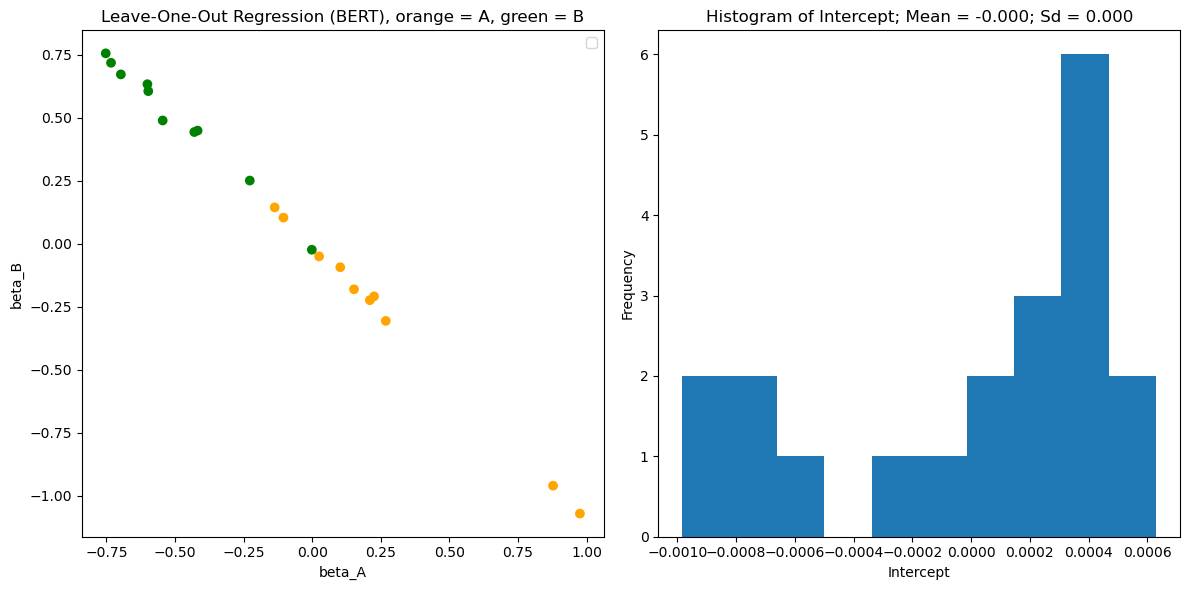

In [34]:
lResults = loo_regression(tEmbeddingsA.detach().numpy(), tEmbeddingsB.detach().numpy(), tEmbeddings_demeaned.detach().numpy(), "Reverse Engineer")
lResults = loo_regression(tFLEmbeddingsA.detach().numpy(), tFLEmbeddingsB.detach().numpy(), tFLEmbeddings_demeaned.detach().numpy(), "FL Reverse Engineer")
lResults = loo_regression(tLLEmbeddingsA.detach().numpy(), tLLEmbeddingsB.detach().numpy(), tLLEmbeddings_demeaned.detach().numpy(), "LL Reverse Engineer")
lResults = loo_regression(tInputEmbeddingsA.detach().numpy(), tInputEmbeddingsB.detach().numpy(), tInputEmbeddings_demeaned.detach().numpy(), "Input Embedding-GPT2")
lResults = loo_regression(seWord2Vec[:10, ], seWord2Vec[10:, ], seWord2Vec - np.mean(seWord2Vec, axis=0), "Word2Vec")
lResults = loo_regression(seBoW[:10, ], seBoW[10:, ], seBoW - np.mean(seBoW, axis=0), "BoW")
lResults = loo_regression(seBert[:10, ], seBert[10:, ], seBert - np.mean(seBert, axis=0), "BERT")

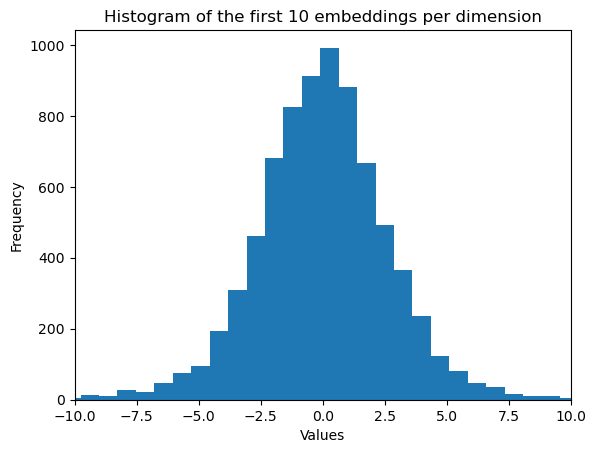

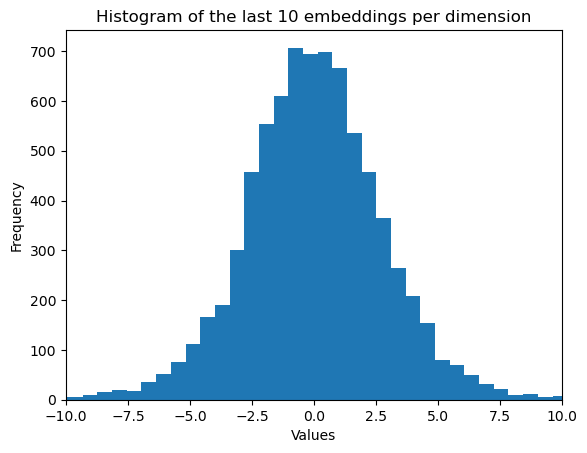

In [35]:
plt.hist(tEmbeddings[:iNumEmbeddings, :].detach().flatten(), bins=50)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title(f'Histogram of the first {iNumEmbeddings} embeddings per dimension')
plt.xlim(-10, 10)
plt.show()

plt.hist(tEmbeddings[iNumEmbeddings:, :].detach().flatten(), bins=50)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title(f'Histogram of the last {iNumEmbeddings} embeddings per dimension')
plt.xlim(-10, 10)
plt.show()

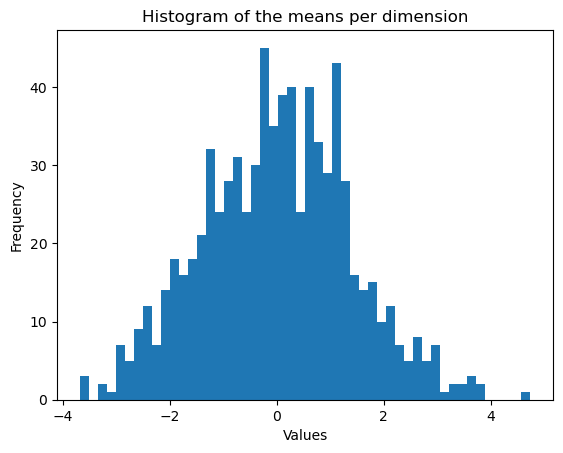

In [36]:
plt.hist(torch.mean(tEmbeddings, dim=0).detach().flatten(), bins=50)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of the means per dimension')
plt.show()

In [40]:
tEmbeddingsA, tEmbeddingsB = load_embeddings(sPathEmbeddings, "tangible_hair_prec.pkl", "intangible_hair_prec.pkl")
tEmbeddingsHair = torch.cat((tEmbeddingsA, tEmbeddingsB), dim=0)
tEmbeddingsHair_demeaned = tEmbeddingsHair - torch.mean(tEmbeddingsHair, dim=0)

tEmbeddingsA, tEmbeddingsB = load_embeddings(sPathEmbeddings, "tangible_cleaner_prec.pkl", "intangible_cleaner_prec.pkl")
tEmbeddingsCleaner = torch.cat((tEmbeddingsA, tEmbeddingsB), dim=0)
tEmbeddingsCleaner_demeaned = tEmbeddingsCleaner - torch.mean(tEmbeddingsHair, dim=0)

tLLEmbeddingsA, tLLEmbeddingsB = load_embeddings(sPathEmbeddings, f"first_last_layer/lh_tangible_hair_prec.pkl", f"first_last_layer/lh_intangible_hair_prec.pkl")
tLLEmbeddingsHair = torch.cat((tLLEmbeddingsA, tLLEmbeddingsB), dim=0)
tLLEmbeddingsHair_demeaned = tLLEmbeddingsHair - torch.mean(tLLEmbeddingsHair, dim=0)

tFLEmbeddingsA, tFLEmbeddingsB = load_embeddings(sPathEmbeddings, f"first_last_layer/fh_tangible_hair_prec.pkl", f"first_last_layer/fh_intangible_hair_prec.pkl")
tFLEmbeddingsHair = torch.cat((tFLEmbeddingsA, tFLEmbeddingsB), dim=0)
tFLEmbeddingsHair_demeaned = tFLEmbeddingsHair - torch.mean(tFLEmbeddingsHair, dim=0)

tLLEmbeddingsA, tLLEmbeddingsB = load_embeddings(sPathEmbeddings, f"first_last_layer/lh_tangible_cleaner_prec.pkl", f"first_last_layer/lh_intangible_cleaner_prec.pkl")
tLLEmbeddingsCleaner = torch.cat((tLLEmbeddingsA, tLLEmbeddingsB), dim=0)
tLLEmbeddingsCleaner_demeaned = tLLEmbeddingsCleaner - torch.mean(tLLEmbeddingsCleaner, dim=0)

tFLEmbeddingsA, tFLEmbeddingsB = load_embeddings(sPathEmbeddings, f"first_last_layer/fh_tangible_cleaner_prec.pkl", f"first_last_layer/fh_intangible_cleaner_prec.pkl")
tFLEmbeddingsCleaner = torch.cat((tFLEmbeddingsA, tFLEmbeddingsB), dim=0)
tFLEmbeddingsCleaner_demeaned = tFLEmbeddingsCleaner - torch.mean(tFLEmbeddingsCleaner, dim=0)

s_model = 'gpt2'
model = GPT2LMHeadModel.from_pretrained(s_model)
tokenizer = AutoTokenizer.from_pretrained(s_model)

lInputEmbeddingsAll = list()
for claim in lClaimsAll:
    lInputEmbeddingsAll.append(torch.mean(model.get_input_embeddings()(tokenizer.encode(claim, return_tensors="pt")), dim = 1))
tInputEmbeddingsAll = torch.stack(lInputEmbeddingsAll).squeeze(1)


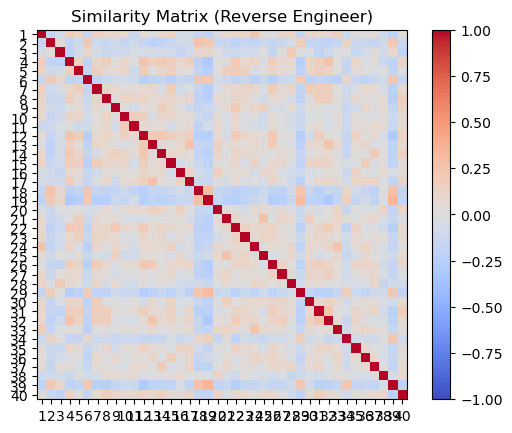

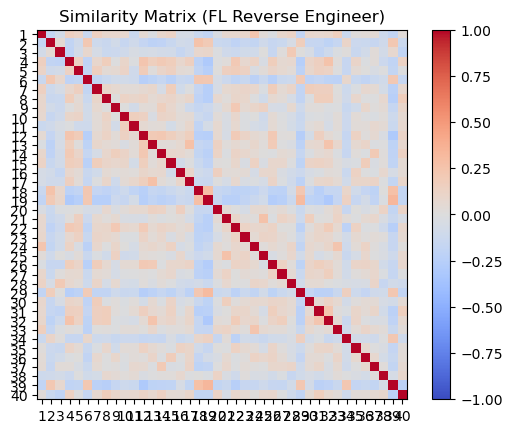

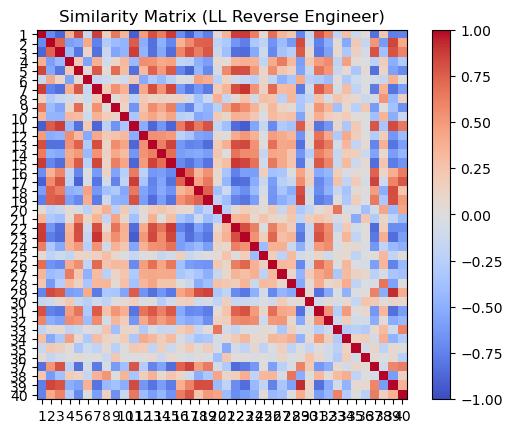

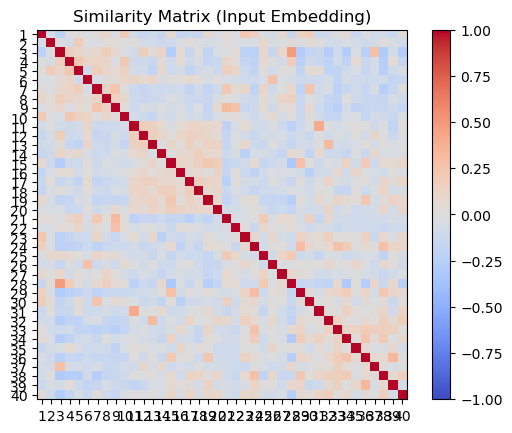

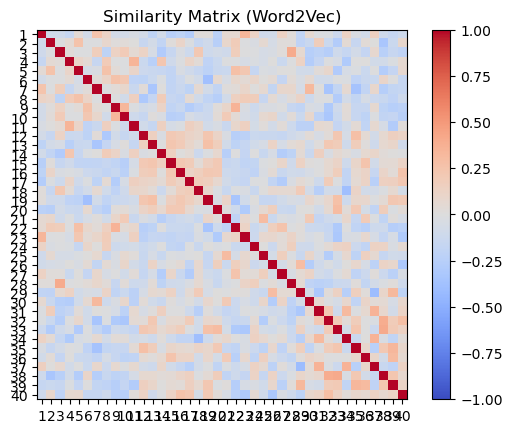

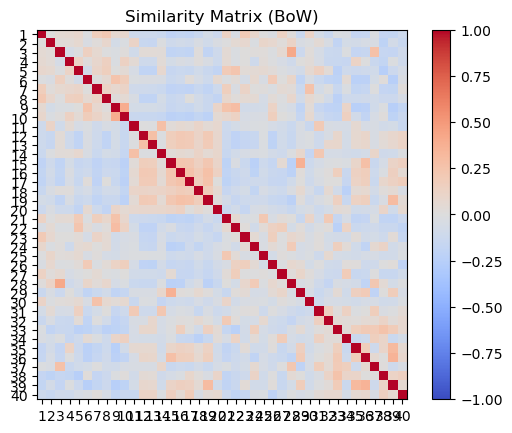

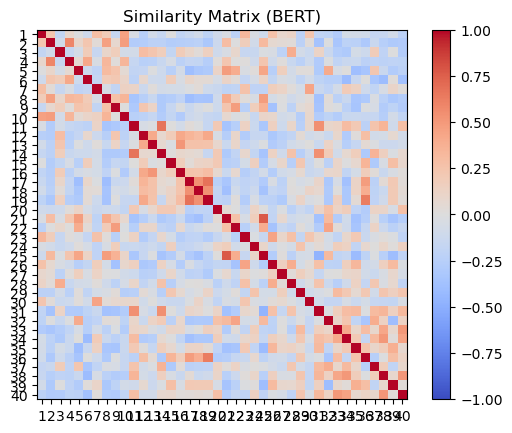

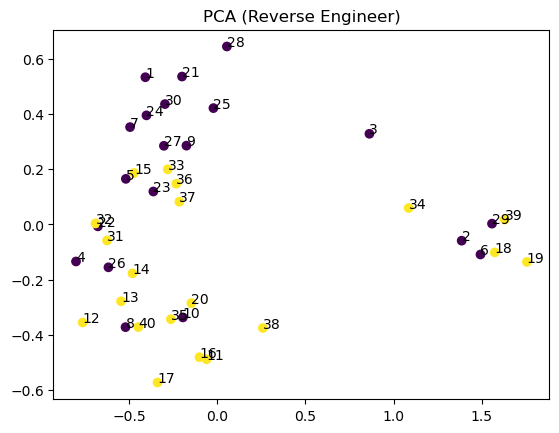

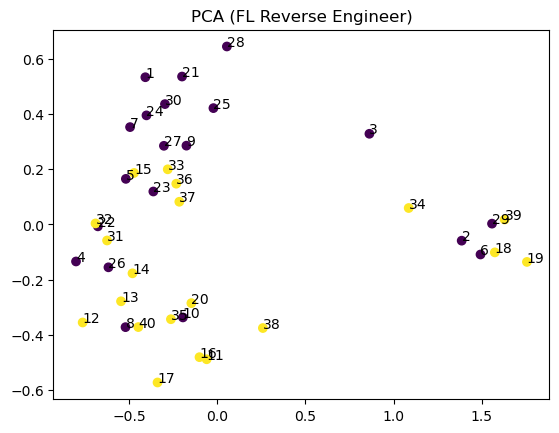

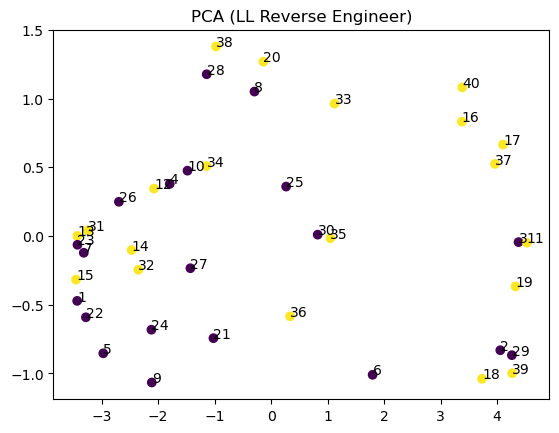

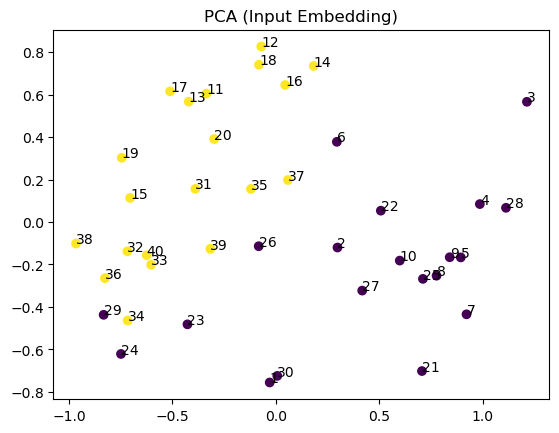

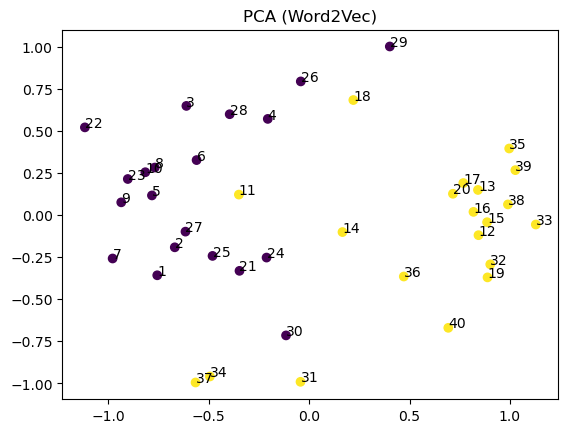

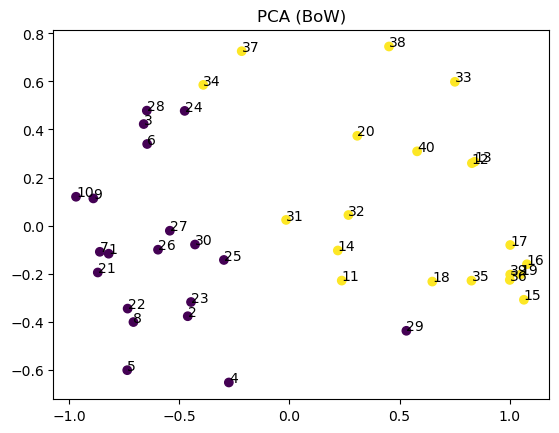

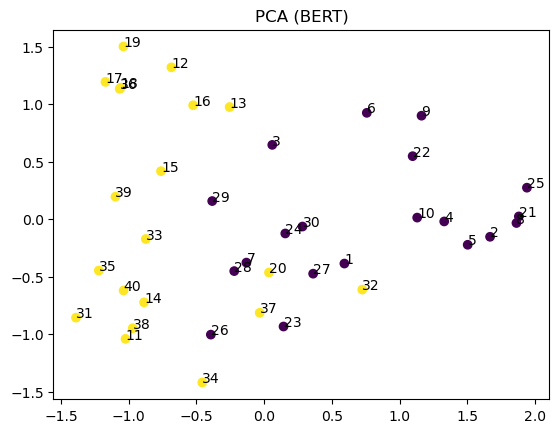

In [41]:
tEmbeddingsAll = torch.cat((tEmbeddingsHair, tEmbeddingsCleaner), dim=0)
tEmbeddingsAll_demeaned = torch.cat((tEmbeddingsHair - torch.mean(tEmbeddingsHair, axis = 0), tEmbeddingsCleaner - torch.mean(tEmbeddingsCleaner, axis = 0)), dim=0)
tEmbeddingsAllA = torch.cat((tEmbeddingsHair[:10, ], tEmbeddingsCleaner[:10, ]), dim=0)
tEmbeddingsAllB = torch.cat((tEmbeddingsHair[10:, ], tEmbeddingsCleaner[10:, ]), dim=0)

tFLEmbeddingsAll = torch.cat((tFLEmbeddingsHair, tFLEmbeddingsCleaner), dim=0)
tFLEmbeddingsAll_demeaned = torch.cat((tFLEmbeddingsHair - torch.mean(tFLEmbeddingsHair, axis = 0), tFLEmbeddingsCleaner - torch.mean(tFLEmbeddingsCleaner, axis = 0)), dim=0)

tLLEmbeddingsAll = torch.cat((tLLEmbeddingsHair, tLLEmbeddingsCleaner), dim=0)
tLLEmbeddingsAll_demeaned = torch.cat((tLLEmbeddingsHair - torch.mean(tLLEmbeddingsHair, axis = 0), tLLEmbeddingsCleaner - torch.mean(tLLEmbeddingsCleaner, axis = 0)), dim=0)

lClaimsAll = lClaimsHair + lClaimsSurface

SE = SummaryEmbeddings(lClaimsAll)
seBert = SE.bert()
seBoW = SE.bow()
seWord2Vec = SE.word2vec()

similarity_matrix_bert = calc_similarity_matrix(seBert)
similarity_matrix_bow = calc_similarity_matrix(seBoW)
similarity_matrix_word2vec = calc_similarity_matrix(seWord2Vec)
similarity_matrix_re = calc_similarity_matrix(tEmbeddingsAll.detach().numpy())
similarity_matrix_ie = calc_similarity_matrix(tInputEmbeddingsAll.detach().numpy())
similarity_matrix_re_fl = calc_similarity_matrix(tFLEmbeddingsAll.detach().numpy())
similarity_matrix_re_ll = calc_similarity_matrix(tLLEmbeddingsAll.detach().numpy())


visualize_correlations(similarity_matrix_re, "Reverse Engineer")
visualize_correlations(similarity_matrix_re_fl, "FL Reverse Engineer")
visualize_correlations(similarity_matrix_re_ll, "LL Reverse Engineer")
visualize_correlations(similarity_matrix_ie, "Input Embedding")
visualize_correlations(similarity_matrix_word2vec, "Word2Vec")
visualize_correlations(similarity_matrix_bow, "BoW")
visualize_correlations(similarity_matrix_bert, "BERT")

# 0 is tangible, 1 is intangible
vColorAssign = np.zeros(40)
vColorAssign[:10] = 0
vColorAssign[10:20] = 1
vColorAssign[20:30] = 0
vColorAssign[30:] = 1

visualize_pca(similarity_matrix_re, "Reverse Engineer", vColorAssign)
visualize_pca(similarity_matrix_re_fl, "FL Reverse Engineer", vColorAssign)
visualize_pca(similarity_matrix_re_ll, "LL Reverse Engineer", vColorAssign)
visualize_pca(similarity_matrix_ie, "Input Embedding", vColorAssign)
visualize_pca(similarity_matrix_word2vec, "Word2Vec", vColorAssign)
visualize_pca(similarity_matrix_bow, "BoW", vColorAssign)
visualize_pca(similarity_matrix_bert, "BERT", vColorAssign)

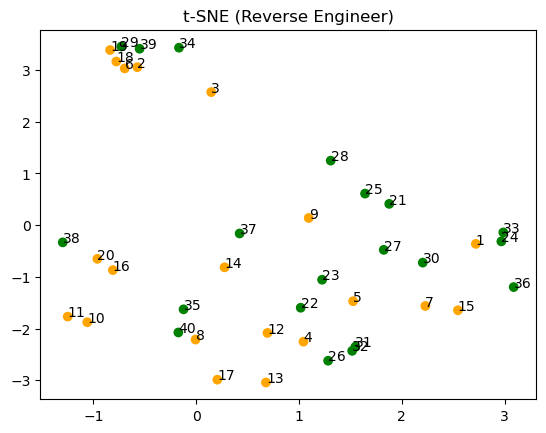

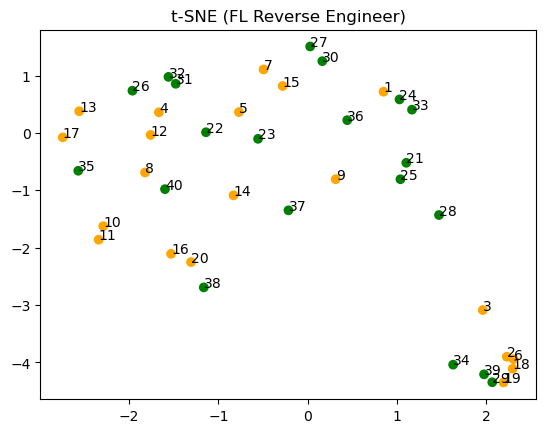

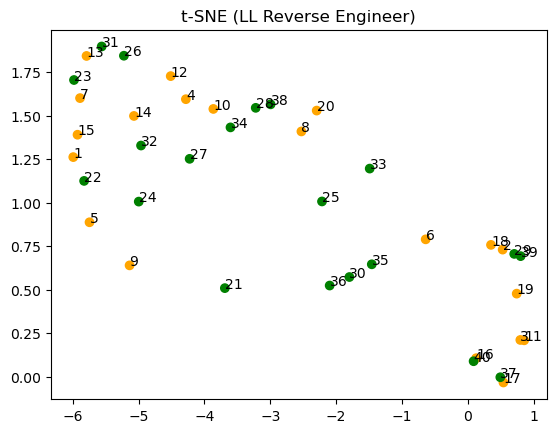

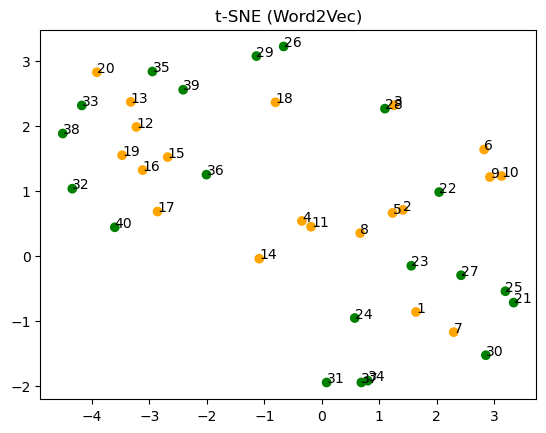

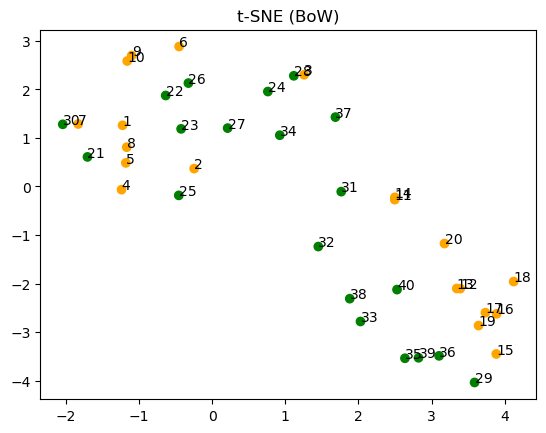

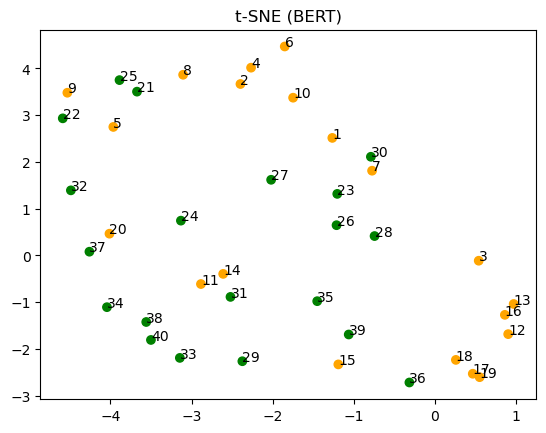

In [39]:
iPerplexity = 20
visualize_tsne(similarity_matrix_re, "Reverse Engineer", iPerplexity)
visualize_tsne(similarity_matrix_re_fl, "FL Reverse Engineer", iPerplexity)
visualize_tsne(similarity_matrix_re_ll, "LL Reverse Engineer", iPerplexity)
visualize_tsne(similarity_matrix_ie, "Input Embedding", iPerplexity)
visualize_tsne(similarity_matrix_word2vec, "Word2Vec", iPerplexity)
visualize_tsne(similarity_matrix_bow, "BoW", iPerplexity)
visualize_tsne(similarity_matrix_bert, "BERT", iPerplexity)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


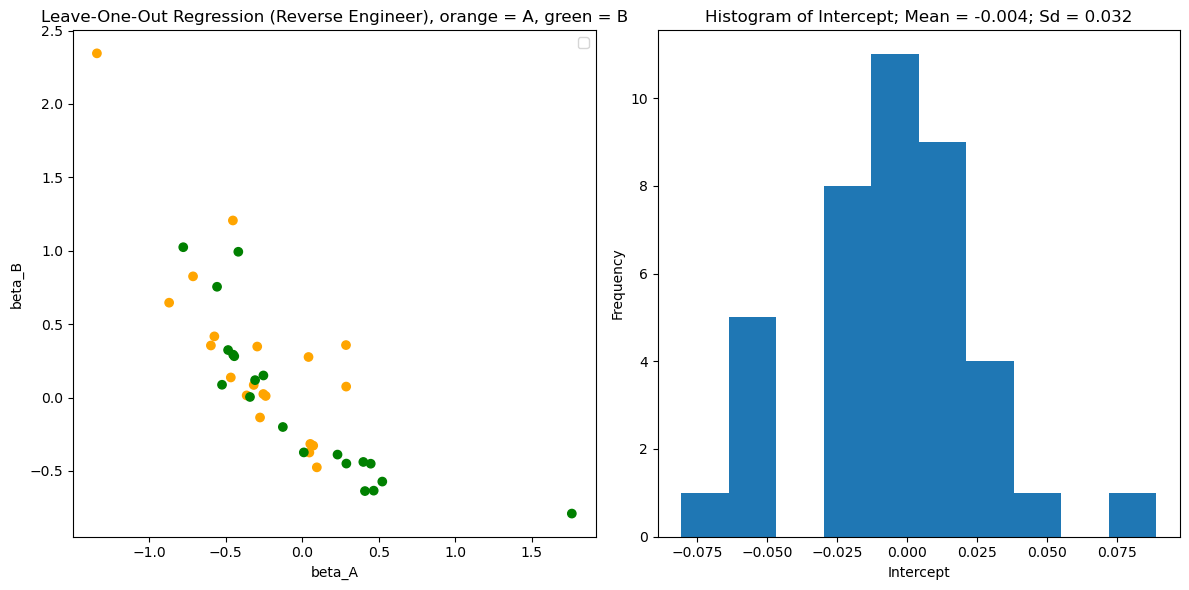

In [59]:
SE = SummaryEmbeddings(lClaimsAll)
embeddings_bert = SE.bert()
embeddings_word2vec = SE.word2vec()
embeddings_bow = SE.bow()

lResults = loo_regression(tEmbeddingsAllA.detach().numpy(), tEmbeddingsAllB.detach().numpy(), (tEmbeddingsAll - torch.mean(tEmbeddingsAll, dim=0)).detach().numpy(), "Reverse Engineer")
# lResults = loo_regression(embeddings_word2vec[:10, ], embeddings_word2vec[10:, ], embeddings_word2vec - np.mean(embeddings_word2vec, axis=0), "Word2Vec")
# lResults = loo_regression(embeddings_bow[:10, ], embeddings_bow[10:, ], embeddings_bow - np.mean(embeddings_bow, axis=0), "BoW")
# lResults = loo_regression(embeddings_bert[:10, ], embeddings_bert[10:, ], embeddings_bert - np.mean(embeddings_bert, axis=0), "BERT")